## Given File 'startup_funding.csv'

## Number of Fundings

Check the trend of investments over the years. To check the trend, find -

Total number of fundings done in each year.

Plot a line graph between year and number of fundings. Take year on x-axis and number of fundings on y-axis.

Print year-wise total number of fundings also. Print years in ascending order.

Note :

There is some error in the 'Date' feature. Make sure to handle that.

Output Format :

year1 TotalFunding1

year2 TotalFunding2

. . . 

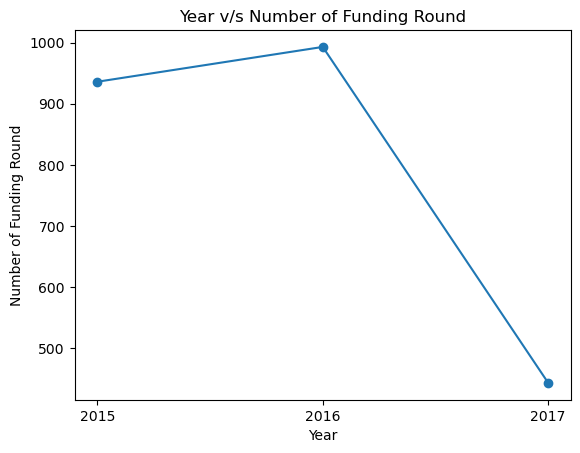

2015 936
2016 993
2017 443


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_start = pd.read_csv('startup_funding.csv', encoding = 'utf-8')
df_start['Year'] = df_start['Date'].str[-4:]
year_count = df_start['Year'].value_counts()
year_fund = list(zip(year_count.index, year_count.values))
year_fund = np.array(year_fund, dtype = int)
year_fund = year_fund[year_fund[:, 0].argsort()]  # sorting on the basis of year
year = year_fund[:, 0]
funding_round = year_fund[:, 1]

plt.plot(year, funding_round, marker = 'o')
plt.xticks(year)
plt.title('Year v/s Number of Funding Round')
plt.xlabel('Year')
plt.ylabel('Number of Funding Round')
plt.show()

for i in range(len(year)):
    print(year[i], funding_round[i])

## Top Indian Cities

Find out which cities are generally chosen for starting a startup.

Find top 10 Indian cities which have most number of startups ?

Plot a pie chart and visualise it.

Print the city name and number of startups in that city also.

Output Format :

city1 number1

city2 number2

. . . 

Note :
Take city name "Delhi" as "New Delhi".

Check the case-sensitiveness of cities also. That means - at some place, instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore".

For few startups multiple locations are given, one Indian and one Foreign. Count those startups in Indian startup also. Indian city name is first.

Print the city in descending order with respect to the number of startups.

Bangalore 635
Mumbai 449
New Delhi 389
Gurgaon 241
Pune 91
Noida 79
Hyderabad 77
Chennai 67
Ahmedabad 35
Jaipur 25


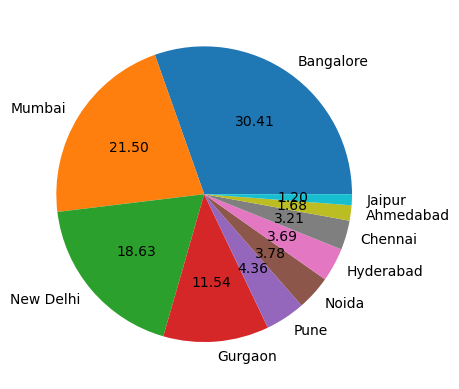

In [32]:
import pandas as pd
import numpy as np

df_start = pd.read_csv('startup_funding.csv', encoding = 'utf-8')
df_start = df_start.dropna(subset = ['CityLocation'])

def separateCity(city):
    return city.split('/')[0].strip()

df_start['CityLocation'] = df_start['CityLocation'].apply(separateCity)
df_start['CityLocation'].replace("Delhi", "New Delhi", inplace = True)
df_start['CityLocation'].replace("bangalore", "Bangalore", inplace = True)
city_number = df_start['CityLocation'].value_counts()[0:10]
city = city_number.index
numCity = city_number.values

for i in range(len(city)):
    print(city[i], numCity[i])
    
plt.pie(numCity, labels = city, autopct = '%.2f')
plt.show()

## Funding amount

Find out if cities play any role in receiving funding.

Find top 10 Indian cities with most amount of fundings received. Find out percentage of funding each city has got (among top 10 Indian cities only).

Print the city and percentage with 2 decimal place after rounding off.

Note:

Take city name "Delhi" as "New Delhi".

Check the case-sensitiveness of cities also. That means - at some place, instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore".

For few startups multiple locations are given, one Indian and one Foreign. Count those startups in Indian startup also. Indian city name is first.

Print the city in descending order with respect to the percentage of funding.

Output Format :

city1 percent1

city2 percent2

city3 percent3

. . . 

. . .

. . .


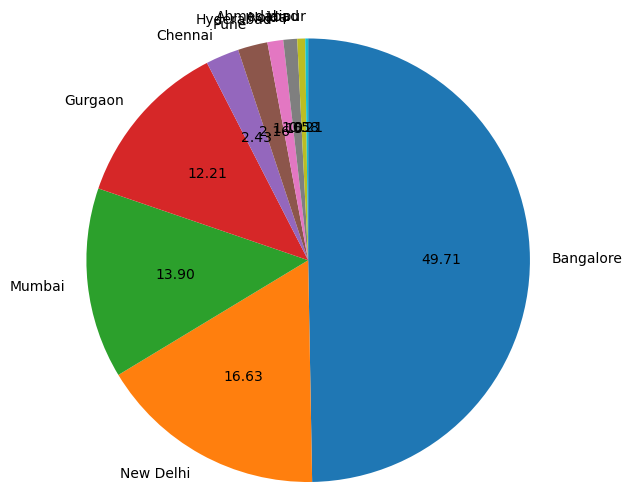

Bangalore 49.71
New Delhi 16.63
Mumbai 13.90
Gurgaon 12.21
Chennai 2.43
Pune 2.16
Hyderabad 1.15
Noida 1.01
Ahmedabad 0.58
Jaipur 0.21


In [23]:
import pandas as pd
import numpy as np

df_start = pd.read_csv('startup_funding.csv', encoding = 'utf-8')
df_start = df_start.dropna(subset = ['CityLocation'])

def separateCity(city):
    return city.split('/')[0].strip()

df_start['CityLocation'] = df_start['CityLocation'].apply(separateCity)
df_start['CityLocation'].replace("Delhi", "New Delhi", inplace = True)
df_start['CityLocation'].replace("bangalore", "Bangalore", inplace = True)

## converting "AmountInUSD" into numeric format
df_start["AmountInUSD"] = df_start['AmountInUSD'].apply(lambda x : float(str(x).replace(",", "")))

df_start = df_start.groupby('CityLocation')['AmountInUSD'].sum()
df_start = df_start.sort_values(ascending = False)[0 : 10]

city = df_start.index
amount = df_start.values

plt.pie(amount, labels = city, autopct='%.2f', counterclock = False, startangle = 90, radius = 1.5)
plt.show()

percent = np.true_divide(amount, amount.sum())*100
for i in range(len(city)):
    print(city[i], format(percent[i], '.2f'))

## Investment Type

There are 4 different type of investments. Find out percentage of amount funded for each investment type.

Plot a pie chart to visualise.

Print the investment type and percentage of amount funded with 2 decimal places after rounding off.

Note :

Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column.

Print the investment type in descending order with respect to the percentage of the amount funded.

Output Format :

investmentType1 percent1

investmentType2 percent2

investmentType3 percent3

. . . 


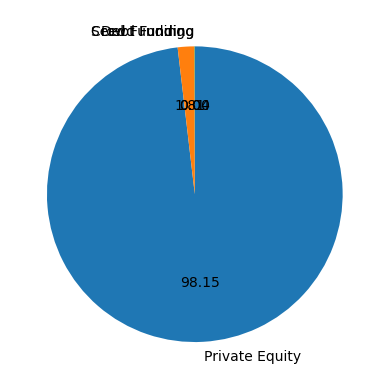

Private Equity 98.15
Seed Funding 1.81
Debt Funding 0.04
Crowd Funding 0.00


In [28]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

df_start = pd.read_csv('startup_funding.csv', encoding = 'utf-8')
df_start['AmountInUSD'] = df_start['AmountInUSD'].apply(lambda x : float(str(x).replace(",", "")))
df_start['InvestmentType'] = df_start['InvestmentType'].replace(['Crowd funding', 'PrivateEquity', 'SeedFunding'], ['Crowd Funding', 'Private Equity', 'Seed Funding'])

df_start = df_start.groupby('InvestmentType')['AmountInUSD'].sum()
df_start = df_start.sort_values(ascending = False)

InvestmentType = df_start.index
amount = df_start.values
plt.pie(amount, labels = InvestmentType, autopct = '%0.2f', counterclock = False, startangle = 90)
plt.show()

percent = np.true_divide(amount, amount.sum())*100
for i in range(len(InvestmentType)):
    print(InvestmentType[i], format(percent[i], '0.2f'))

## Top Industries

Which type of companies got more easily funding. To answer this question, find -

Top 5 industries and percentage of the total amount funded to that industry. (among top 5 only)

Print the industry name and percentage of the amount funded with 2 decimal place after rounding off.

Note :

Ecommerce is the right word in IndustryVertical, so correct it.

Print the industry in descending order with respect to the percentage of the amount funded.

Output Format :

industry1 percent1

industry2 percent2

industry3 percent3

. . . 

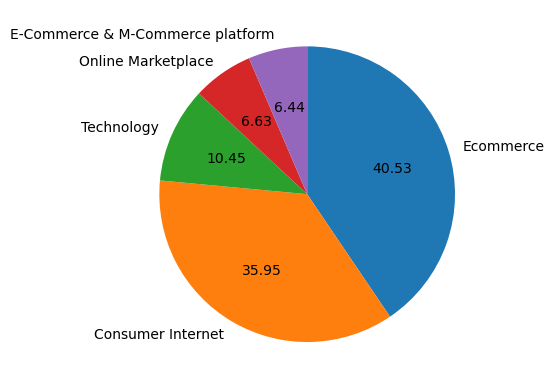

Ecommerce 40.53
Consumer Internet 35.95
Technology 10.45
Online Marketplace 6.63
E-Commerce & M-Commerce platform 6.44


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_start = pd.read_csv('startup_funding.csv', encoding = 'utf-8')
df_start['IndustryVertical'].replace('ECommerce', 'Ecommerce', inplace = True)
df_start['IndustryVertical'].replace('eCommerce', 'Ecommerce', inplace = True)
df_start['IndustryVertical'].replace('ecommerce', 'Ecommerce', inplace = True)

df_start['AmountInUSD'] = df_start['AmountInUSD'].apply(lambda x : float(str(x).replace(",", "")))
df_start = df_start.groupby('IndustryVertical')['AmountInUSD'].sum()
df_start = df_start.sort_values(ascending = False)[:5]

industry = df_start.index
amount = df_start.values

plt.pie(amount, labels = industry, autopct = '%0.2f', counterclock = False, startangle = 90)
plt.show()
percent = np.true_divide(amount, amount.sum())*100
for i in range(len(industry)):
    print(industry[i], format(percent[i], '0.2f'))

## Top startups

Find top 5 startups with most amount of total funding.

Print the startup name in descending order with respect to amount of funding.

Note:

Ola, Flipkart, Oyo, Paytm are important startups, so correct their names. There are many errors in startup names, ignore correcting all, just handle important ones.

Output Format :

startup1

startup2

startup3

. . . 

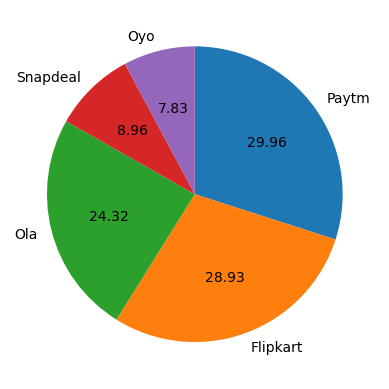

Paytm
Flipkart
Ola
Snapdeal
Oyo


In [30]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

df_start = pd.read_csv('startup_funding.csv', encoding = 'utf-8')
df_start['AmountInUSD'] = df_start['AmountInUSD'].apply(lambda x : float(str(x).replace(",", "")))
df_start['StartupName'] = df_start['StartupName'].replace(['Flipkart.com', 'Ola Cabs', 'Olacabs', 'Oyo Rooms', 'Oyorooms', 'OyoRooms', 'Paytm Marketplace'], ['Flipkart', 'Ola', 'Ola', 'Oyo', 'Oyo', 'Oyo', 'Paytm'])

df_start = df_start.groupby('StartupName')['AmountInUSD'].sum()
df_start = df_start.sort_values(ascending = False)[:5]

industryVertical = df_start.index
amount = df_start.values

plt.pie(amount, labels = industryVertical, autopct = '%0.2f', counterclock = False, startangle = 90)
plt.show()

for i in range(len(industryVertical)):
    print(industryVertical[i])

## Funding rounds

Find the top 5 startups who received the most number of funding rounds. That means, startups which got fundings maximum number of times.

Print the startup name in descending order with respect to the number of funding round as integer value.

Note:

Ola, Flipkart, Oyo, Paytm are important startups, so correct their names. There are many errors in startup names, ignore correcting all, just handle important ones.

Output Format :

startup1 number1

startup2 number2

startup3 number3

. . . 

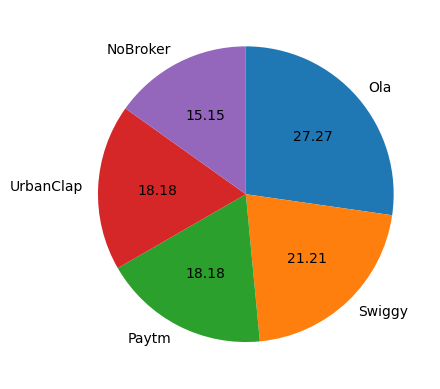

Ola 9
Swiggy 7
Paytm 6
UrbanClap 6
NoBroker 5


In [33]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

df_start = pd.read_csv('startup_funding.csv', encoding = 'utf-8')
df_start['StartupName'] = df_start['StartupName'].replace(['Flipkart.com', 'Ola Cabs', 'Olacabs', 'Oyo Rooms', 'Oyorooms', 'OyoRooms', 'Paytm Marketplace'], ['Flipkart', 'Ola', 'Ola', 'Oyo', 'Oyo', 'Oyo', 'Paytm'])

start_round = df_start['StartupName'].value_counts()[0 : 5]
startup = start_round.index
fundround = start_round.values

plt.pie(fundround, labels = startup, autopct = '%0.2f', counterclock = False, startangle = 90)
plt.show()

for i in range(len(startup)):
    print(startup[i], fundround[i])

## Top Investor

Find the Investors who have invested maximum number of times.

Print the investor name and number of times invested as integer value.

Note:

In startup, multiple investors might have invested. So consider each investor for that startup.

Ignore the undisclosed investors.

Output Format :

investorname number

In [41]:
import pandas as pd 
import numpy as np 

df_start = pd.read_csv('startup_funding.csv', encoding = 'utf-8')
df_start = df_start.dropna(subset = ['InvestorsName'])

def createDictionary(array):
    dictionary = {}
    for i in array:
        if ',' not in i:
            if i in dictionary:
                dictionary[i] = dictionary.get(i) + 1   # The get() method returns the value of the item with the specified key
            else:
                dictionary[i] = 1
        else:
            string = i.strip().split(',')
            for j in string:
                if j.strip() in dictionary:
                    dictionary[j.strip()] = dictionary.get(j.strip()) + 1
                else:
                    dictionary[j.strip()] = 1
    return dictionary

dictionary = createDictionary(df_start['InvestorsName'])  # stores investor names as keys and number of investments as values
df = pd.DataFrame(list(dictionary.values()), list(dictionary.keys()))  # The keys() and values() method in Python Dictionary, returns a view object
df = df.sort_values(by = [0], ascending = False)  # investor names are index, number of indexes is 1st column - 0
print(df.index[0], df.values[0][0])

Sequoia Capital 64
